# Case 5 - Linear Regression Residuals

## Introduction
**Context.** You are a data analyst a recently launched prop-tech startup. And you have been asigned the task of identifying which features are importat when determining the price of a house.  

**Problem.** Your task is to build a model to predict the price of a house from the data set using all the provided information

**Analytical Context.** 
In previous days, the concept of machine learning has been defined as a group of techniques used to identify patterns relating features, classify new observations, predicting values and grouping observations. In this module we will explain a simple approach for regression problems, the linear regression. 

## Packages Import

In [1]:
!pip install statsmodels

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
from sklearn.datasets import fetch_california_housing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from matplotlib import cm
from pandas.plotting import scatter_matrix
import statsmodels.graphics.correlation
from statsmodels.stats import diagnostic

## Data Import

In [3]:
california_housing = fetch_california_housing()
df_california = pd.DataFrame(california_housing.data,columns=california_housing.feature_names)
df_california['Price']=pd.Series(california_housing.target*1000)
df_california = df_california[df_california['Price']<=4900]
df_california['MedInc']=df_california['MedInc']*1000
df_california.dropna(inplace=True)
df_california.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8325.2,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4526.0
1,8301.4,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3585.0
2,7257.4,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3521.0


## Exploratory Data Analysis

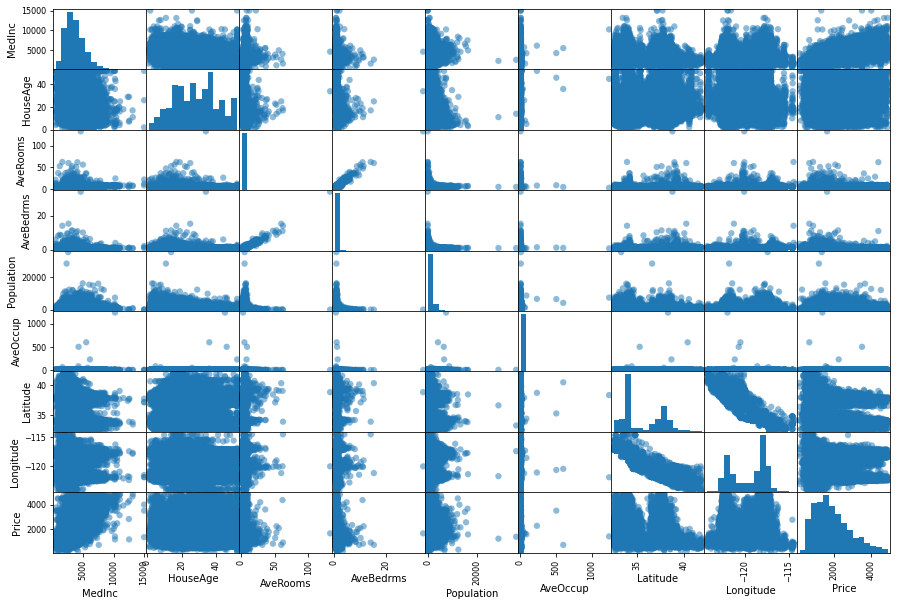

In [4]:
cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(df_california, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(15,10), cmap=cmap)

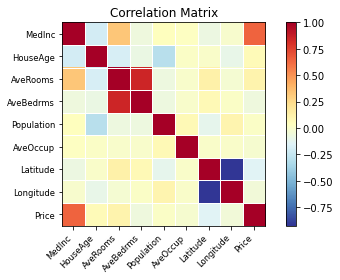

In [5]:
corr_mat = df_california.corr()
statsmodels.graphics.correlation.plot_corr(corr_mat,xnames=df_california.columns, ynames=df_california.columns);

# Potential problems observed on residuals

## Residual plot generation

As the linear regression assumes a linear relationship between the input and output variables. If this relationship is not linear, the results gotten from the model cannot be trusted. Additionally, the prediction accuracy of the model will be severely pauperized. In order to determine if a linear fit is enough, a plot of the regression residuals (errors) can be useful: 

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                 1.395e+04
Date:                Mon, 07 Feb 2022   Prob (F-statistic):               0.00
Time:                        20:26:55   Log-Likelihood:            -1.5726e+05
No. Observations:               19609   AIC:                         3.145e+05
Df Residuals:                   19607   BIC:                         3.145e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    458.5346     13.400     34.218      0.0

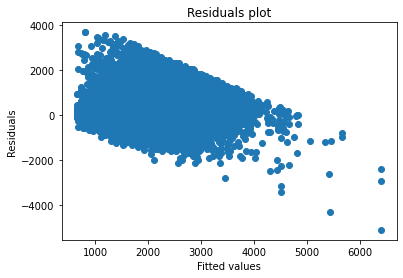

In [6]:
est = smf.ols('Price ~ MedInc', df_california).fit()
print(est.summary())

#Residual plot 
plt.scatter(est.fittedvalues,est.resid)
plt.ylabel('Residuals')
plt.xlabel('Fitted values')
plt.title('Residuals plot')
plt.show()

## Interpretation of residual plot

### Residual Calculation

Remember that in machine learning the relationship between input and output variables is expressed as $Y=f(X)+\epsilon$, where $\epsilon$ is often assumed to have a Normal distribution with a mean equal to zero. Now, assuming that $f$ is a linear function, the relationship between $Y$ and $X$ is expressed as the Linear Regression model: <center>$Y = \beta_0 + \beta_1X+\epsilon$</center> 

where $\beta_0$ is the intercept (the value $Y$ takes when $X=0$) and $\beta_1$ is the slope (the amount that $Y$ increases when $X$ increases in one unit). The error term $\epsilon$ is a term used to account for everything that can be missed by the model, i.e. the real relationship not being linear, the effect of other variables that are not being taken into account in the model and the measurment error. The error term is also often assumed to be independet from the input variable $X$, i.e. the prediction's error will not depend on the value of the variable $X$. 

Thus, the residual is calculated as: <center>$\epsilon=Y-(\beta_0+\beta_1X)$</center> 
Wich means:  <center>$\epsilon=Y- \hat Y$</center> <center>$\epsilon=Observed- Predicted$</center> 


### Normality assumption

When testing the significance of the coefficients, the t statistic is used as the distribution of the coefficients' estimates is assumed to be a Normal one. This assumption of normality comes from the assumption that the error term of the estimation is a random variable with a Normal distribution: <center> $Y=\beta_0+\beta_1X_1 +\beta_2X_2 + \dots + \beta_mX_m + \epsilon$ </center> <center> $\epsilon \sim N(0,\sigma^2)$ </center>

As $\epsilon$ is a random variable with a Normal distribution and the coefficients are linear transformations of it, then the coefficients' estimates are also random variables with a Normal distribution. The justification for the assumption of normality in the error terms comes from the definition of the error term as the term that contains the aggregate effect of variables that are not taken into account into the model. As these unaccounted variables are multiple and the error term takes the value of the aggregate effect of them, by the central limit theorem, the aggregate effect will have a Normal distribution. However, this assumption of the normality in the model's residuals are almost never true, which makes the assumption of normality in the estimates' distributions to be untrue as well. If this assumption is not met, then the t statistic for analyzing the significance of the coefficients will not be completely correct.  

How concerned should you be if your model isn’t perfect? **It’s up to you**. If you’re publishing your thesis in particle physics, you probably want to make sure your model is as accurate as humanly possible. If you’re trying to run a quick and dirty analysis of your nephew’s lemonade stand, a less-than-perfect model might be good enough to answer whatever questions you have (e.g., whether “Temperature” appears to affect “Revenue”). Most of the time a decent model is better than none at all. So take your model, try to improve it, and then decide whether the accuracy is good enough to be useful for your purposes.

Let's take a look at the approximate distribution of the residuals in the one-variable  model we have built:

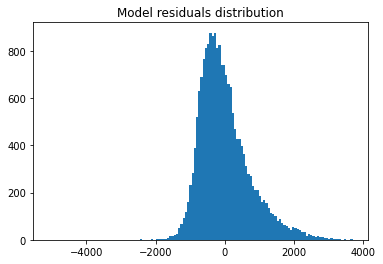

In [7]:
#Histogram of the model's residuals
plt.hist(est.resid, bins="auto")
plt.title("Model residuals distribution")
plt.show()

###  Excercise 1

Considering the histogram of the residuals, do they look as if could have a normal distribution?

**Answer**

### Patterns in the scatterplot of residuals

Ideally, there will be no recognizable pattern in the residuals plot. If there is a some non-linearity in the relationship between the data, there will be a pattern in the residuals plot. 

So, a good scatter plot of residuals should look like this:

<figure> 
<img src="/indu5012_case_5/fig/Good-scatter-of-residuals.png" alt="Good-res" align="center" width="700" height="700" /> 

<figcaption align = "center"><b>Fig. 5.1 - Residuals plot for a good linear regression model </b>.<i>Taken from (Qualtrics®, 2022)</i></figcaption>
</figure> 


Instead, a not-so-good residual plot should look like this:

<figure> 
<img src="/indu5012_case_5/fig/Not-Good-scatter-of-residuals.png"  alt="Good-res" align="center" width="700" height="700"/> 

<figcaption align = "center"><b>Fig. 5.2 - Residuals plot for a not-so-good linear regression model </b>.<i>Taken from (Qualtrics®, 2022)</i></figcaption>
</figure> 

Some of typical non-disired paterns in residual plots are:

- Unbalanced axes
- Heteroskedasticity
- Nonlinearity
- Strange patterns


This patterns might arise from problemas such as:
- Bad Data
- Non-constant variance of error terms
- Correlation of error terms
- Outliers
- Multicollinearity

So, let´s take a look at a scatter plot of the two variables, together with a lineal model of the relationship. 

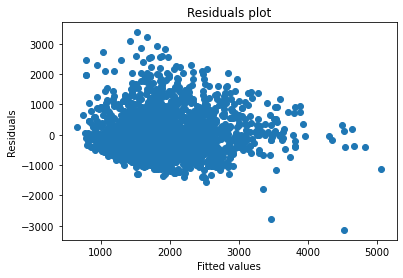

In [8]:
est = smf.ols('Price ~ MedInc', df_california).fit()

#Residual plot 
plt.scatter(est.fittedvalues.sample(n=2000, random_state=2),est.resid.sample(n=2000, random_state=2))
plt.ylabel('Residuals')
plt.xlabel('Fitted values')
plt.title('Residuals plot')
plt.show()

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='MedInc', ylabel='Price'>

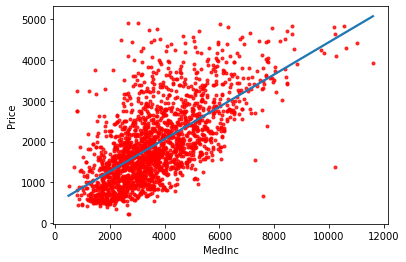

In [9]:
sns.regplot(df_california.MedInc.sample(n=2000, random_state=2),df_california.Price.sample(n=2000, random_state=2), order=1, ci=None, scatter_kws={'color':'r', 's':9})

###  Excercise 1

What are the main differences between the lineal model and the actual trend of the data?

**Answer**

###  Excercise 2

Run a regression for each one of the variables (one by one) against `Price`. What can you tell about the residuals and the overall fit of the lineal model?

**Answer**

###  Excercise 3

Run a regression for all the variables against `Price` (full model). What can you tell about the residuals and the overall fir of the lineal model?

**Answer**

### Correlation of error terms

As we have seen before, the linear regression model assumes that the error terms $\epsilon$ are i.i.d. (independent and identically distributed). That means that the error terms $\epsilon_1, \epsilon_2, \epsilon_3,\ \dots \ ,\epsilon_n$ are uncorrelated. However, in some cases these error terms might be autocorrelated, meaning that an error term in a particular moment $t$, $\epsilon_t$, depends on the error term in the moment that happened before, $\epsilon_{t-1}$. As the estimation of the standard errors for the coefficients is based on the assumption of the independence of the error terms, this estimation will not be correct when the assumption is not true. In fact, the estimation that we have seen will be an underestimation of the real standard error when there is no independence. 

Correlation of error terms can happen in <b> time series</b>, which are observations of a particular variable that are made in different points in time. When these observations are made in close intervals of time, they tend to have a positive correlation between them. Think, for example, in the USD/COP conversion rate, if a USD is equal to 3,800 COP in a moment in time, it is highly likely that the exchage rate 10 minutes after will be around that 3,800 COP mark. Therefore, in order to predict time series other models, such as ARIMA models, are used. These models take into account the correlation between observations to create their predictions. 

Another source of correlation between the error terms of the model can be a non-rigorous process when collecting the sample used to do the statistical analysis. When collecting the sample, it is very important to be sure that it is a randomly generated sample. If only observations with similar characteristics are taken from the population, some correlation can be included. Therefore, it is important to take the experiment design seriously to avoid the risk of such correlations.

### Non-constant variance of error terms

Another important assumption made in the linear regression models is that the error terms have a constant variance: $Var(\epsilon_i)=\sigma^2$. The standard errors, confidence intervals and hypothesis tests for the coefficients are based on this assumption. However, in some cases the variance of the errors begins to differ as you move along the fitted values. In order to identify the non-constat values of the variance, also known as <b>heteroscedasticity</b>, the residuals plot can also be checked. An example where there is heteroscedasticity can have the following residuals plot: 

<figure> 
<img src="/indu5012_case_5/fig/Heteroscedasticity.PNG" align="center"/> 

<figcaption align = "center"><b>Fig. 5.3 - Residuals plot for a linear regression model with heteroscedasticity problems </b>.<i>Taken from (James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013))</i></figcaption>
</figure> 


However, there are statistical tests that can be used in order to determine if a model has heteroscedasticity problems. The tests that we will see in this course will be the White test and the Breusch-Pagan test. Both of them test the following hyptohesis:  <center> $H_0:$ The variance of the error terms is constant (homoscedasticity)</center>  <center> $H_a:$ The variances of the error terms are not constant (heteroscedasticity)</center> 

In order to calculate this tests, it is needed to fit an auxiliary linear regression model in order to determine the relationship between input variables and the error variance. For the Breusch-Pagan test, the auxiliary regression that is fitted is the following one: <center> $e^2=\beta_0+\beta_1X_1 +\beta_2X_2 + \dots + \beta_mX_m$ </center>

In this linear resgression model, the squared residuals are used as the estimation of the variance for a particular fitted value and the model will check if there is a relationship between these variances and the value of the input features. The test statistic for the Breusch-Pagan test is the value $nR^2$, where $n$ is the number of observations and $R^2$ is the $R^2$ metric for the auxiliary regression. 

For the White test, the auxiliary regression that is fitted is the following one: <center> $e^2=\beta_0+\beta_1X_1 +\beta_2X_2 + \dots + \beta_mX_m + \beta_{m+1}X_1^2 +\beta_{m+2}X_2^2 + \dots + \beta_{2m}X_m^2+ \beta_{2m+1}X_1X_2 + \dots + \beta_{2m+\frac{m!}{2!(m-2)!}}X_mX_{m-1}$ </center>

the test statistic for the white test is also $nR^2$. Both the Breush-Pagan and the White test statistics  assymptotically distributes as a $\chi^2_{P-1}$ distribution, where $P$ is the number of parameters estimated in the auxiliary regression. It is possible to use these heteroscedasticity tests for a linear regression model using Python. Let us try using them on our previous linear regression model:

In [10]:
from statsmodels.stats import diagnostic

est = smf.ols("Price ~ MedInc + HouseAge + AveRooms + AveBedrms + AveOccup + Latitude + Longitude", df_california).fit()

_, pval, __, f_pval = diagnostic.het_white(est.resid, est.model.exog)
print(_,pval, f_pval)

_, pval, __, f_pval = diagnostic.het_breuschpagan(est.resid, est.model.exog)
print(_,pval, f_pval)

3734.978276824984 0.0 0.0
1635.8226175817417 0.0 0.0


Analyzing the results, both of the tests indicate that there is a heteroscedasticity problem in our model. Let us run the auxiliary regression for the Breusch-Pagan test to see its results:

In [11]:
residuals = est.resid
est_BP = smf.ols("I(residuals**2) ~ MedInc + HouseAge + AveRooms + AveBedrms + AveOccup + Latitude + Longitude", df_california).fit()
est_BP.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      I(residuals ** 2)   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     254.9
Date:                Mon, 07 Feb 2022   Prob (F-statistic):               0.00
Time:                        20:26:56   Log-Likelihood:            -2.9540e+05
No. Observations:               19609   AIC:                         5.908e+05
Df Residuals:                   19601   BIC:                         5.909e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -6.97e+06   7.93e+05     -8.791      0.000   -8.52e+06   -5.42e+06
MedInc       107.1109      6.149     17.420      0.000      95.058     119.163
HouseAge    6645.9277    516.980     12.855      0.000    5632.603    7659.252
AveRooms   -1.051e+05   7529.269    -13.963      0.000    -1.2e+05   -9.04e+04
AveBedrms   9.285e+05   3.47e+04     26.728      0.000     8.6e+05    9.97e+05
AveOccup     604.8981    566.624      1.068      0.286    -505.734    1715.530
Latitude    -6.59e+04   8641.593     -7.626      0.000   -8.28e+04    -4.9e+04
Longitude  -7.257e+04   9069.603     -8.001      0.000   -9.03e+04   -5.48e+04
==============================================================================
Omnibus:                    26699.484   Durbin-Watson:                   1.476
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         13916520.502
Skew:                           7.573   Prob(JB):                         0.00
Kurtosis:                     132.628   Cond. No.                     5.25e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.25e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In some cases it is very difficult to solve the heteroscedasticity problems. Therefore, the interpretation made about statistics that come from the estimation of standard deviations of the error terms are not accurate. In order to mitigate this problem, it is possible to use robust variances or weighted linear regressions. As there are multiple ways to estimate a robust variance, let us fit the model using the White-Huber-Eicker standard errors:

In [13]:
est = smf.ols("Price ~ MedInc + HouseAge + AveRooms + AveBedrms + AveOccup + Latitude + Longitude", df_california).fit(cov_type='HC1')
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     3092.
Date:                Mon, 07 Feb 2022   Prob (F-statistic):               0.00
Time:                        20:26:57   Log-Likelihood:            -1.5418e+05
No. Observations:               19609   AIC:                         3.084e+05
Df Residuals:                   19601   BIC:                         3.084e+05
Df Model:                           7                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -3.36e+04    724.575    -46.369      0.0

### Outliers

An outlier is a point for which its $y$ value is far from the predicted value. Outliers can arise by a variety of reasons, such as non-diligence when taking the data or the presence of some observations that are simply extremely rare cases. In our case, it seems to be a couple of extremely rare cases: 

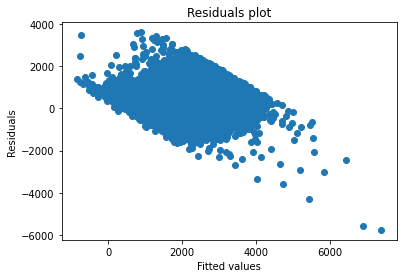

In [14]:
est = smf.ols("Price ~ MedInc + HouseAge + AveRooms + AveBedrms + AveOccup + Latitude + Longitude", df_california).fit(cov_type='HC1')

plt.scatter(est.fittedvalues,est.resid)
plt.ylabel('Residuals')
plt.xlabel('Fitted values')
plt.title('Residuals plot')
plt.show()

It is difficult to detect and classify outliers. In order to do that, plotting the residuals plot can help identifying the outliers. A good rule of thumb for classifying outliers can be calculating the studentized residuals, which are the residuals divided by its estimated standard error. The studentized residuals that are higher than 3 in absolute value are possible outliers. Let us calculate the studentized residuals for our regression problem:

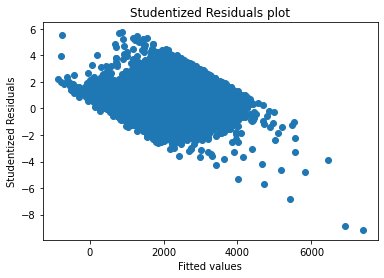

In [15]:
plt.scatter(est.fittedvalues,est.resid/np.sqrt(est.mse_resid))
plt.ylabel('Studentized Residuals')
plt.xlabel('Fitted values')
plt.title('Studentized Residuals plot')
plt.show()

### Multicollinearity

Multicollinearity refers to a situation in which two or more predictors are closely correlated. When introducing collinear predictors into a linear regression problem, the model has trouble identyfing independent effects that are related to each of the collinear predictors. As the presence of collinearity reduces the accuracy of the coefficient estimations, the standard error of them will increase. As the parameter estimations' standard deviation increases, it will become easier to not reject the null hypothesis for some coefficients, reducing the ability of the t-test to successfully detect a non-zero parameter. To identify if there is multicollinearity present in the predictors of a model, a correlation matrix for the predictors is not the best approach, as the collinear predictors might be more than two at the same time and the matrix helps only to determine correlation between pairs of predictors. On that account, the metric used to determine the presence of collinearity in a linear regression model is the variance inflation factor (VIF). The VIF is the ratio of the variance of the estimation of a particular coefficient $\hat\beta_j$ when having a full model and the variance of that estimation for a model that only contains that parameter. To calculate the VIF for the $j^{th}$ predictor, the following auxiliary regression is fitted: <center> $X_j=\beta_0+\beta_1X_1 +\beta_2X_2 + \dots + \beta_mX_m$ </center>

This regression has the $j^{th}$ predictor as output variables and all of the other predictors as input variables. After fitting this model, the VIF for the $j^{th}$ predictor is calculated as: <center> $VIF_j = \frac{1}{1-R^2_{X_j|X_{-j}}}$ </center>

where $R^2_{X_j|X_{-j}}$ is the $R^2$ of the auxiliary regression mentioned before. If a predictor has a VIF higher than 5 or 10 indicates a problematic amout of collinearity. If there are collinearity problems in the data, the first solution is to drop one of the problematic predictors, as the other correlated predictors will still capture the effect of the dropped predictor. The second solution is to join the correlated predicitor into a single predictor using (normally) standardized values of the correlated predictors.

Let us see if there were multicollinearity problems in the Boston housing data predictors:

In [16]:
#Importing function to calculate VIF's
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = df_california.columns[df_california.columns != "Price"]
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_california.values, i)
                          for i in range(len(df_california.columns[df_california.columns != "Price"]))]

print(vif_data)


      feature         VIF
0      MedInc   23.811652
1    HouseAge    7.733695
2    AveRooms   52.015073
3   AveBedrms   47.560199
4  Population    2.946447
5    AveOccup    1.098381
6    Latitude  569.868524
7   Longitude  655.130508


Not all of multicollinearity problems must be resolved and this depends on the main objective of the linear regression model. Multicollinearity impacts the estimation of coefficients and p-vlues of the predictors that have a multicollinearity problem. Therefore, if the main objective of the model is only to predict, multicollinearity is not a problem.

## Possible solutions to the problems

There are several path that can be taken in order to solve the previously found problems:
- Variable tansformations
- Data improvement
- Data removal
- Cluster removal
- Include interactions among variables


But the use of these techniques does not garantee the solution, or even the combination of several of them.

When non-linearities are present in the data, ab commonly used and simple approach is to include non-linear transformations of input variables (such as $\frac{1}{X}$, $log(X)$, $X^2$ or $\sqrt X$) in the linear regression model. 

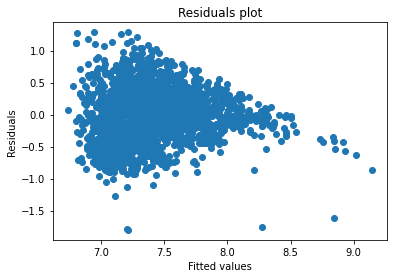

In [18]:
est = smf.ols('I(np.log(Price)) ~ MedInc', df_california).fit()

#Residual plot 
plt.scatter(est.fittedvalues.sample(n=2000, random_state=2),est.resid.sample(n=2000, random_state=2))
plt.ylabel('Residuals')
plt.xlabel('Fitted values')
plt.title('Residuals plot')
plt.show()

###  Excercise 4

Take the regression for  one of the variables against `Price`. Identify one or several problems and proceed to try to solve it by using the list of possible solutions mentioned previously

**Answer**

###  Excercise 5

Propose the best lineal model that you can come up with

**Answer**

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=09faa166-4678-4733-b101-40dafb0d1eaf' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>